In [1]:
# Setup working directory where raw data is found. 

import os 
desired_directory = 'X'
os.chdir(desired_directory)

In [ ]:
######################################################
# STEP 1 
    # Create txt files out of csvs and clean it (removing unecessary lines)

import os

# Specify the folder containing the CSV files
folder_path = 'X'

# Create a new folder for clean data if it doesn't exist
clean_data_folder = os.path.join(folder_path, 'CleanData')   # Modify name as per convinience. 
os.makedirs(clean_data_folder, exist_ok=True)

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Loop through each CSV file
for csv_file in csv_files:
    # Construct the full path to the CSV file
    input_file = os.path.join(folder_path, csv_file)

    # Create a new file name with "_txt" added to the original name
    output_file = os.path.join(clean_data_folder, csv_file.replace('.csv', '.txt'))

    # Read the CSV file and convert it to a text file while removing specified lines
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as txt_file:
        lines_to_remove = {1, 2, 4, 6,7, 8}
        for i, line in enumerate(csv_file, start=1):
            if i not in lines_to_remove:
                txt_file.write(line)

    print(f"CSV file {csv_file} converted to text with specified lines removed: {output_file}")


######################################################
# STEP 2 
    # Create clean csv files 

# Get a list of all text files in the CleanData folder
clean_txt_files = [file for file in os.listdir(clean_data_folder) if file.endswith('.txt')]

# Loop through each text file in the CleanData folder
for txt_file in clean_txt_files:
    # Construct the full path to the text file
    input_file = os.path.join(clean_data_folder, txt_file)

    # Create a new file name with "_clean.csv" added to the end
    output_file = os.path.join(clean_data_folder, '01_' + txt_file.replace('.txt', '_clean.csv'))

    # Read the text file and convert it back to CSV
    with open(input_file, 'r') as txt_file, open(output_file, 'w') as csv_file:
        for line in txt_file:
            csv_file.write(line)

    print(f"Text file {txt_file} converted back to CSV: {output_file}")

######################################################
# STEP 3
    # Erase txt files after creation of new clean csv files. 

# Erase txt files after creation of new clean csv files
for txt_file in clean_txt_files:
    file_path = os.path.join(clean_data_folder, txt_file)
    os.remove(file_path)
    print(f"Removed text file: {file_path}")

print(f"Clean CSV files saved in the 'CleanData' folder.")


######################################################
# STEP 4
    # Change the headers of the columns to an easier to read and call names. 

# FUTURE WORK
    # Automatically read the header name parse it and extract the channel short name. 

# Specify the folder containing the clean CSV files
folder_path = 'X'

# Get a list of all clean CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('_clean.csv')]

                                                                                                                                    # This will be highly dependent on each stress test and channel name. 
# Define the replacement line
replacement_line = ",,27S,28S,29S,30S,31S,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,X_Sup,Z_Sup,X_Esq,Z_Esq,X_Dir,Cyl,Z_dir,X_RN,Z_RN\n"

# Loop through each clean CSV file
for csv_file in csv_files:
    # Construct the full path to the clean CSV file
    input_file = os.path.join(folder_path, csv_file)

    # Read the content of the clean CSV file
    with open(input_file, 'r') as csv_file:
        lines = csv_file.readlines()

    # Replace the first line with the replacement line
    lines[0] = replacement_line

    # Write the modified content back to the clean CSV file
    with open(input_file, 'w') as csv_file:
        csv_file.writelines(lines)

    print(f"First line of CSV file {csv_file} replaced with the specified values.")


In [6]:
# Setup working directory where clean data was saved. 
import os as os
desired_directory = 'X'
os.chdir(desired_directory)

In [ ]:
run_20_27 = pd.read_csv("X.csv")


In [9]:
selected_channels = ['10']
selected_channels

['10']

Y-value for 10 at X=10.0: 609.7


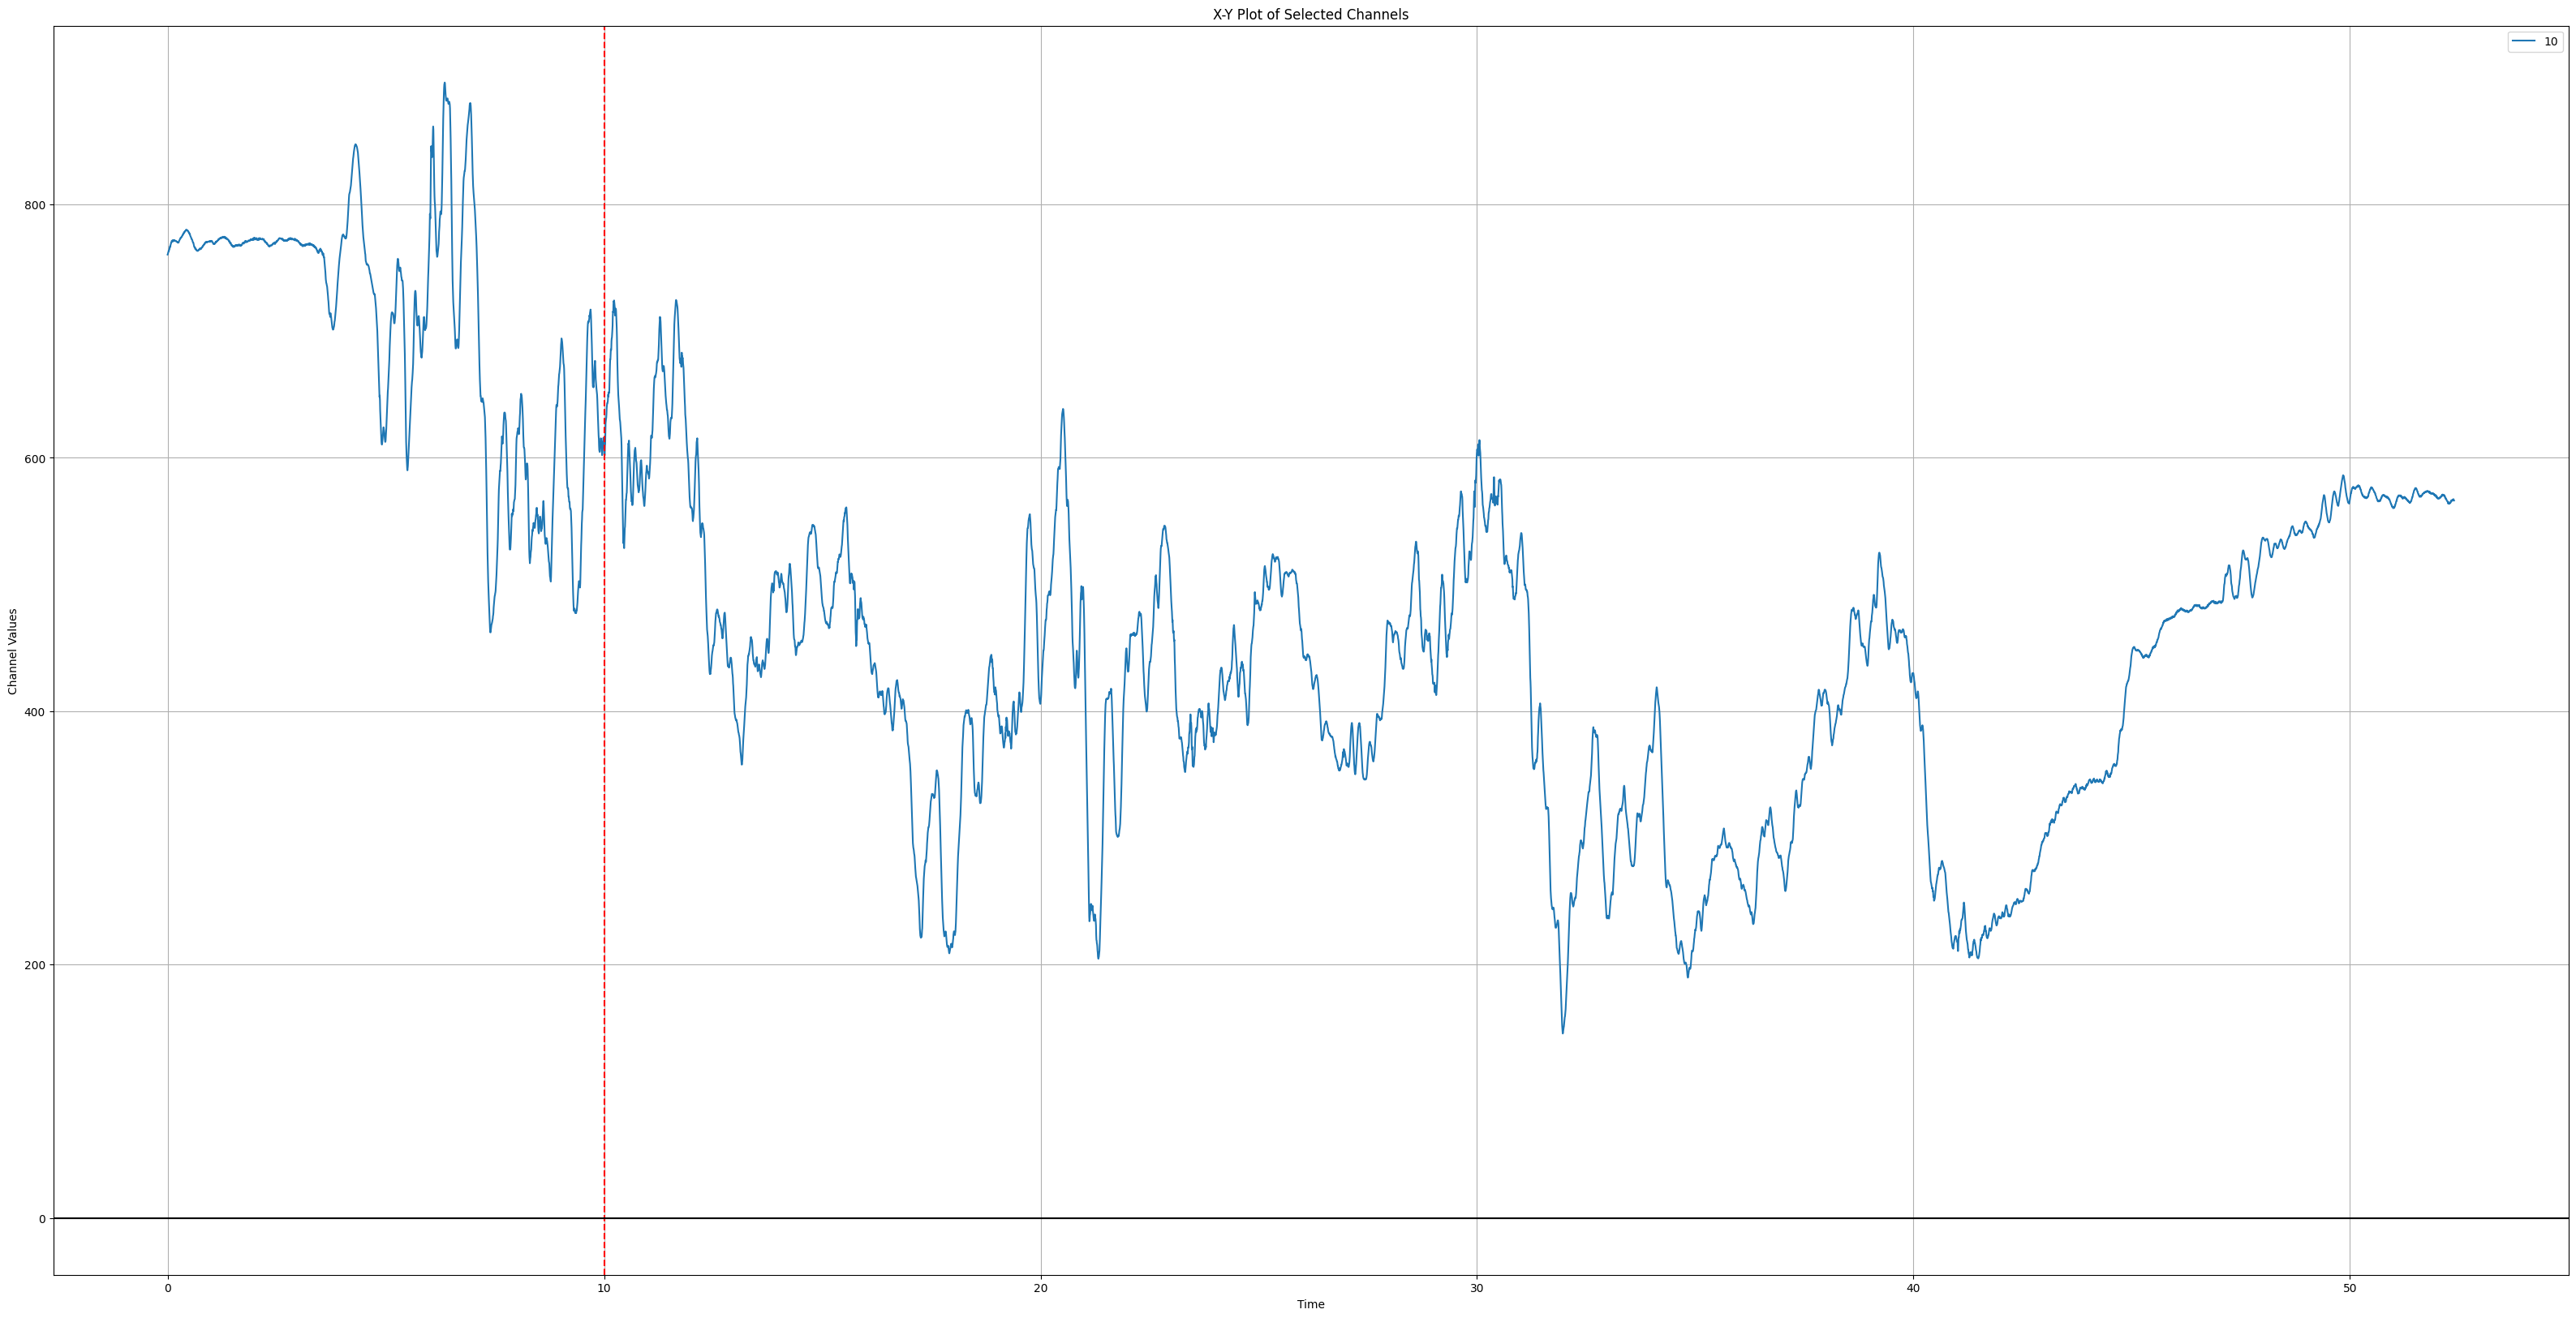

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Prompt the user to enter the name of the DataFrame to read
dataframe_name = input("Enter the name of the DataFrame to read: ")

# Check if the specified DataFrame exists in the global namespace
if dataframe_name in globals() and isinstance(globals()[dataframe_name], pd.DataFrame):
    # Read the specified DataFrame
    original_df = globals()[dataframe_name]

    # Create a new DataFrame by extracting data from row 1 in column with index 1
    new_df = pd.DataFrame(original_df.iloc[1:, 1])

    # Rename the column to "Time" if needed
    new_df.columns = ["Time"]

    # Add data values from selected channels to the new DataFrame, ensuring they are numeric
    for channel in selected_channels:
        if channel in original_df.columns:
            new_df[channel] = pd.to_numeric(original_df[channel].iloc[1:], errors='coerce')

    # Set the "Time" column as the index
    new_df.set_index("Time", inplace=True)

    # Check if there are any numeric columns to plot
    numeric_columns = new_df.select_dtypes(include=[float, int]).columns.tolist()

    if len(numeric_columns) > 0:
        # Create a subplot with the desired figure size
        fig, ax = plt.subplots(figsize=(40, 20))

        # Plot the data on the subplot
        new_df[numeric_columns].plot(ax=ax)

        # Add a grid to the plot
        ax.grid(True)

        # Prompt the user to enter a number for the vertical line
        vertical_line_number = float(input("Enter the x-value for the vertical line: "))

        # Add a vertical line at the specified x-value
        ax.axvline(x=vertical_line_number, color='r', linestyle='--')

        # Add a solid black line at y=0
        ax.axhline(y=0, color='k', linestyle='-')

        # Iterate through selected channels and print y-values for each
        for channel in selected_channels:
            if channel in numeric_columns:
                y_value = new_df.loc[vertical_line_number, channel]
                print(f"Y-value for {channel} at X={vertical_line_number}: {y_value}")

        ax.set_xlabel("Time")
        ax.set_ylabel("Channel Values")
        ax.set_title("X-Y Plot of Selected Channels")
        ax.legend()  # Show the legend with the vertical and horizontal line labels
        plt.show()
    else:
        print("No numeric data to plot in selected channels.")
else:
    print(f"DataFrame '{dataframe_name}' not found or not a valid DataFrame.")

In [11]:

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3: ] # To avoid reading the first row wich contains strings 


# Define the threshold for correlation
threshold = 0.6

# Compute the correlation matrix
corr_matrix = df.corr()

# Prompt the user to enter the column name; Naming should be SGXX
column_name = input("Enter the column name to compare correlations with the rest of the columns: ")

# Check if the entered column name is valid
if column_name not in corr_matrix.columns:
    print("Invalid column name!")
else:
    # Select the specific column for correlation analysis
    correlation_column = corr_matrix[column_name].drop(column_name)

    # Filter correlations above the threshold
    filtered_correlations = correlation_column[correlation_column.abs() > threshold]

    # Sort the correlations from highest to lowest
    sorted_correlations = filtered_correlations.sort_values(ascending=False)

    # Create a new DataFrame to store the results
    result_df = pd.DataFrame({'Column': sorted_correlations.index, 'Correlation': sorted_correlations.values})

    # Print the correlation results

result_df

,Column,Correlation
0,45,0.887005
1,57,0.879883
2,18,0.718714
3,Cyl,0.678609
4,54,0.653168
5,14,0.651936
6,13,0.630920
7,34,0.619713
8,26,0.615613
9,X_RN,-0.609354


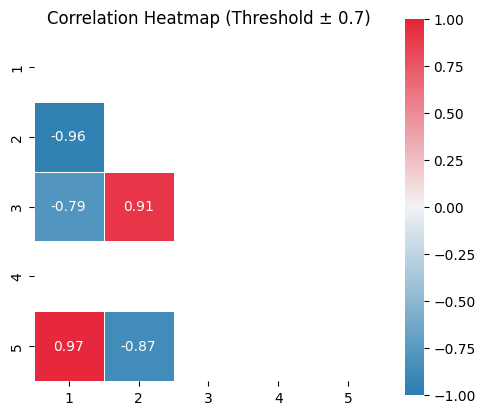

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prompt user for the dataframe name
df_name = input("Enter the dataframe name: ")

# Assuming the dataframe is already assigned to a variable with the name provided by the user
df = globals()[df_name]
df = df.iloc[3:]

# Prompt the user to enter the column names for the correlation heatmap
column_names = input("Enter the column names for the correlation heatmap (comma-separated, or 'ALL' for all columns): ")

# Prompt user for correlation threshold.
threshold = float(input("Enter the desired correlation threshold: "))

if column_names.upper() == "ALL":
    # Select all columns
    df_subset = df
else:
    # Convert input column names to a list
    selected_columns = [col.strip() for col in column_names.split(",")]

    # Select the specified columns by name
    df_subset = df[selected_columns]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Create a mask for the upper triangle, for cleanliness purposes.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure; adaptive size
num_columns = len(df_subset.columns)
fig, ax = plt.subplots(figsize=(num_columns, num_columns))

# Apply the mask to hide the upper triangle
corr_matrix_masked = corr_matrix.mask(mask)

# Create a custom colormap
cmap = sns.diverging_palette(240, 10, s=90, l=50, as_cmap=True)

# Draw the heatmap with the bottom section of the matrix
sns.heatmap(corr_matrix_masked, cmap=cmap, annot=True, fmt=".2f", vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8},
            mask=(np.abs(corr_matrix_masked) < threshold), ax=ax)

if column_names.upper() == "ALL":
    title = 'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'
else:
    title = f'Correlation Heatmap (Threshold ± ' + str(threshold) + ')'

plt.title(title)
plt.tight_layout()
plt.show()


In [ ]:
Outliers 


z score  
Interquartile Range (IQR) method
Modified Z-score method using the median absolute deviation (MAD)

